<a href="https://colab.research.google.com/github/NJena404/sklearn-Begginners/blob/main/ML_toy_project_for_Begginer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps of a ML project

##1.Preprocessing + EDA +Feature selection
##2.Extract input and Output column
##3.Scaling
##4.Train test split
##5.Train model
##6.Evaluate the model or Model selection
##7.Deploy the model

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import data set

df=pd.read_csv('/content/placement.csv')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cgpa       16 non-null     int64
 1   iq         16 non-null     int64
 2   placement  16 non-null     int64
dtypes: int64(3)
memory usage: 512.0 bytes


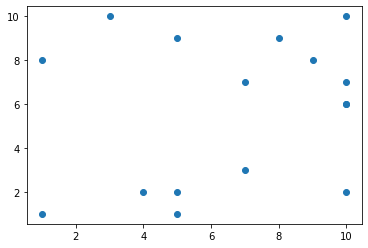

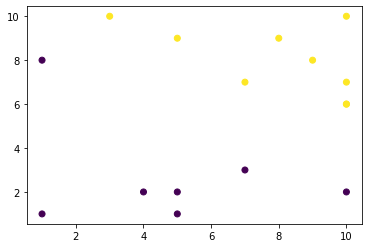

In [ ]:
#visualizing data /searching pattern
plt.scatter(df['cgpa'],df['iq'])
plt.show()
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])  #having placement and not having placement plot
plt.show()

In [ ]:
#Dividing into input column and output column

x=df.iloc[:,0:2]     #input column
y=df.iloc[:,-1]      #output column

In [ ]:
x

,cgpa,iq
0,10,2
1,9,8
2,4,2
3,3,10
4,5,9
5,5,1
6,8,9
7,1,1
8,7,3
9,7,7


In [ ]:
y

0     0
1     1
2     0
3     1
4     1
5     0
6     1
7     0
8     0
9     1
10    0
11    1
12    1
13    1
14    1
15    0
Name: placement, dtype: int64

In [ ]:
#train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9, 2), (7, 2), (9,), (7,))

In [ ]:
y_test

6     1
14    1
12    1
13    1
4     1
0     0
15    0
Name: placement, dtype: int64

In [ ]:
#scaling

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
#model training
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test

6     1
14    1
12    1
13    1
4     1
0     0
15    0
Name: placement, dtype: int64

In [ ]:
#model_evaluation

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8571428571428571

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


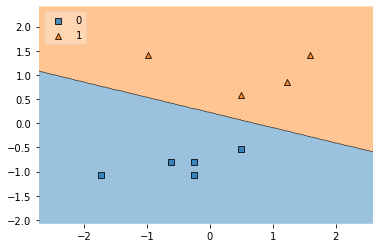

In [ ]:
#visualizing Decision boundary

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values,clf=clf, legend=2)